In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14


In [2]:
import numpy as np
import pandas as pd
import glob

In [3]:
from gi import event_size, fiducial_df, twocluster_df, histoplot, scatter_xy, event_mult, d12, dtz, plot_amplitude
from imgs import plot_image

## Data directories

In [4]:
g4dir = "/Users/jjgomezcadenas/Data/G4Prods/crystalGI/G4BGO"
fid = "isensor_data_bgo_1.csv"
fgi = "gamma_interactions_bgo_1.csv"
fgp = "global_pars_1.csv"
fsp = "sensor_positions.csv"

## Read out global parameters

In [5]:
dfgp = pd.read_csv(f"{g4dir}/{fgp}", header=0)
dfgp

,seed,timeBinning,gammaEnergy,crystalWidth,crystalLength,material,sipmXY,numberOfEvents
0,12340001,200,0.511,48,22.4,BGO,6,20000


In [8]:
dfgp.columns

Index(['seed', 'timeBinning', 'gammaEnergy', 'crystalWidth', 'crystalLength',
       'material', 'sipmXY', 'numberOfEvents'],
      dtype='object')

In [6]:
cw = dfgp.crystalWidth.values[0]
cl = dfgp.crystalLength.values[0]
nn = dfgp.numberOfEvents.values[0]
ge = dfgp.gammaEnergy.values[0]
mat = dfgp.material.values[0]
sxy = dfgp.sipmXY[0]
npx = cw//sxy
print(f"material = {mat}, crystal width = {cw}, length = {cl} nof = {nn}, npixels ={npx} x {npx}")

material = BGO, crystal width = 48, length = 22.4 nof = 20000, npixels =8 x 8


## Readout gamma interactions and prepare metadata (2c df)

In [7]:
dfgi = pd.read_csv(f"{g4dir}/{fgi}", header=0).sort_values(by='event')
dfgi.head(10)

,event,time,x,y,z,edep
0,0,20.3,20.2,-6.4,-5.0,297.7
4,0,24.4,19.0,-6.5,-5.5,213.3
20,1,62.8,-9.5,-17.9,7.6,506.3
19,1,11.1,-10.1,-19.9,-7.8,4.7
33,2,52.8,8.6,-21.6,4.7,511.0
49,3,50.0,2.0,-20.7,3.8,441.6
48,3,48.5,1.9,-20.9,3.5,69.4
68,4,44.9,8.9,-4.6,0.1,178.8
67,4,40.8,9.2,-4.0,1.1,332.2
86,5,37.3,0.6,11.5,0.1,511.0


In [8]:
x_int = event_size(dfgi)/nn
print(f"fraction of events interacting in crystal = {x_int}")

fraction of events interacting in crystal = 0.86495


### Define a fiducial dataframe

In [9]:
dfx = fiducial_df(dfgi, d=cw, z=cl)
dfx.head(10)

,event,time,x,y,z,edep,etot,ntrk
0,0,20.3,20.2,-6.4,-5.0,297.7,511.0,2
1,0,24.4,19.0,-6.5,-5.5,213.3,511.0,2
2,1,62.8,-9.5,-17.9,7.6,506.3,511.0,2
3,1,11.1,-10.1,-19.9,-7.8,4.7,511.0,2
4,2,52.8,8.6,-21.6,4.7,511.0,511.0,1
5,3,50.0,2.0,-20.7,3.8,441.6,511.0,2
6,3,48.5,1.9,-20.9,3.5,69.4,511.0,2
7,4,44.9,8.9,-4.6,0.1,178.8,511.0,2
8,4,40.8,9.2,-4.0,1.1,332.2,511.0,2
9,5,37.3,0.6,11.5,0.1,511.0,511.0,1


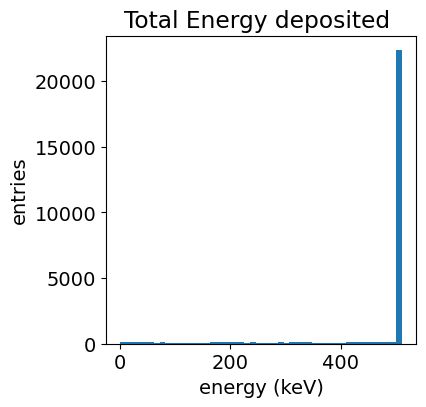

In [10]:
b, e = histoplot(dfx.etot, 'energy (keV)', "entries", bins=50, figsize=(6,6),
                title="Total Energy deposited ")

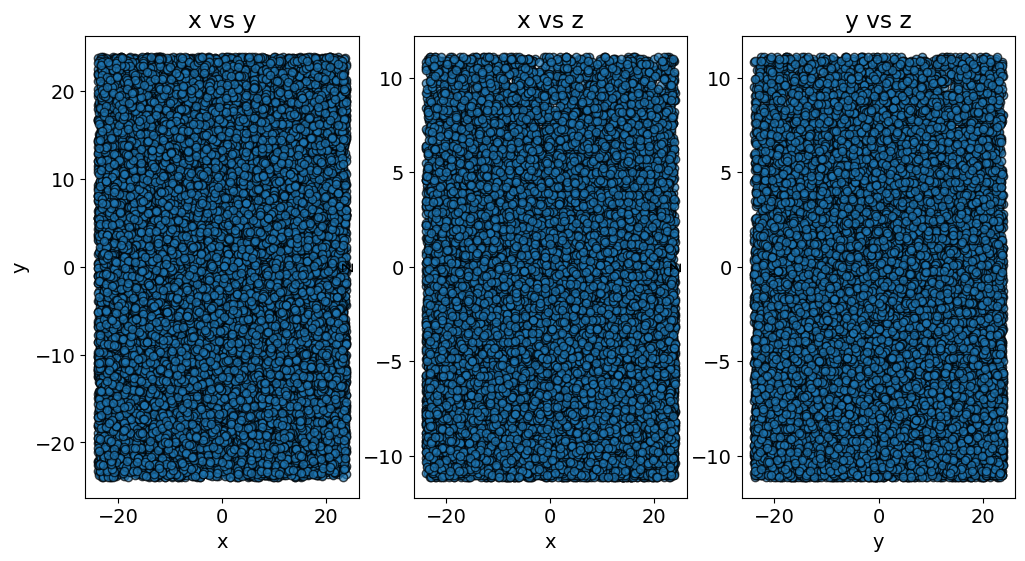

In [11]:
scatter_xy(dfx, figsize=(12, 6))

In [12]:
print(f" mean of x : {(np.mean(dfx.x.values)):.2f}")
print(f" mean of y : {np.mean(dfx.y.values):.2f}")
print(f" mean of z : {np.mean(dfx.z.values):.2f}")

 mean of x : 0.21
 mean of y : 0.11
 mean of z : -2.67


### Cut in energy

In [13]:
ec = 0.98 *ge*1000 # in keV
print(f"cutoff energy = {ec:.2f}")
dfe = dfx[dfx.etot>ec]

cutoff energy = 500.78


In [14]:
x_e = event_size(dfe)/nn
print(f"fraction of events with e > {ec:.1f} keV = {x_e}")

fraction of events with e > 500.8 keV = 0.6655


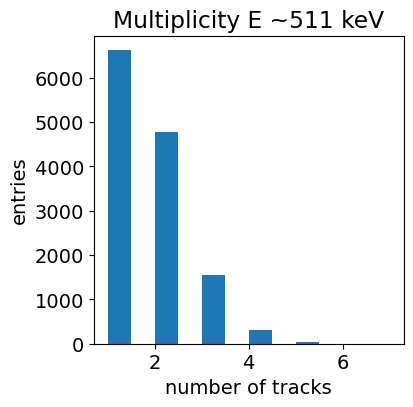

In [15]:
b, e = histoplot(event_mult(dfe), 'number of tracks', "entries", bins=12, figsize=(6,6),
                title="Multiplicity E ~511 keV")

### two cluster data frame (2cdf)

In [16]:
df2c = twocluster_df(dfe).drop('index', axis=1)
df2c.head(10)

,event,etot,ntrk,t1,x1,y1,z1,e1,t2,x2,y2,z2,e2
0,0,511.0,2,20.3,20.2,-6.4,-5.0,297.7,24.4,19.0,-6.5,-5.5,213.3
1,1,511.0,2,11.1,-10.1,-19.9,-7.8,4.7,62.8,-9.5,-17.9,7.6,506.3
2,2,511.0,1,52.8,8.6,-21.6,4.7,511.0,52.8,8.6,-21.6,4.7,511.0
3,3,511.0,2,48.5,1.9,-20.9,3.5,69.4,50.0,2.0,-20.7,3.8,441.6
4,4,511.0,2,40.8,9.2,-4.0,1.1,332.2,44.9,8.9,-4.6,0.1,178.8
5,5,511.0,1,37.3,0.6,11.5,0.1,511.0,37.3,0.6,11.5,0.1,511.0
6,6,511.0,1,5.5,7.3,1.1,-9.4,511.0,5.5,7.3,1.1,-9.4,511.0
7,8,511.0,1,3.2,-17.6,-23.4,-10.1,511.0,3.2,-17.6,-23.4,-10.1,511.0
8,9,511.0,2,44.5,21.4,19.2,2.2,338.7,49.7,20.9,19.2,0.7,172.3
9,10,511.0,1,10.3,-14.2,1.7,-8.0,511.0,10.3,-14.2,1.7,-8.0,511.0


In [17]:
dfpe = df2c[df2c.ntrk==1]
dfco = df2c[df2c.ntrk>1]
print(f"Fraction of photoelectric events  = {event_size(dfpe)/event_size(df2c)}, of compton = {event_size(dfco)/event_size(df2c)}")
print(f"wrt total interactions  = {event_size(dfpe)/nn}, compton = {event_size(dfco)/nn}")

Fraction of photoelectric events  = 0.49729526671675434, of compton = 0.5027047332832457
wrt total interactions  = 0.33095, compton = 0.33455


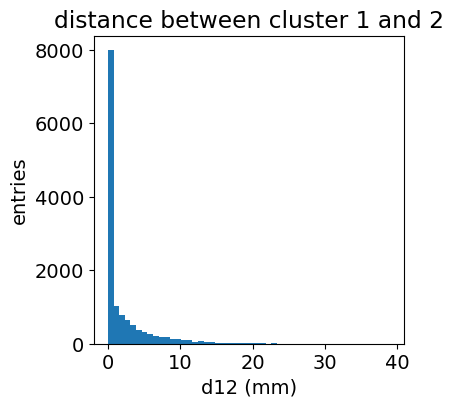

In [18]:
b, e = histoplot(d12(df2c), 'd12 (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between cluster 1 and 2")

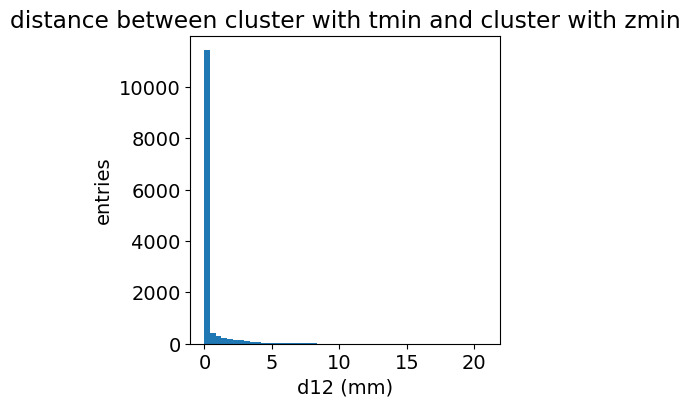

In [19]:
b, e = histoplot(dtz(df2c), 'd12 (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between cluster with tmin and cluster with zmin")

### Z asigment
- The plot above shows that most of the time the assigment of tmin to zmin works well, and results in zero error, with a small tail, which extends up to 5 mm.

## Read sensor data

In [20]:
dfgi = pd.read_csv(f"{g4dir}/{fid}", header=0).sort_values(by='event')
dfgi.head(10)

,event,sensor_id,amplitude
127,0,6,30
93,0,30,36
92,0,43,78
91,0,12,40
90,0,1,24
89,0,59,103
88,0,32,35
87,0,58,88
86,0,28,31
85,0,14,28


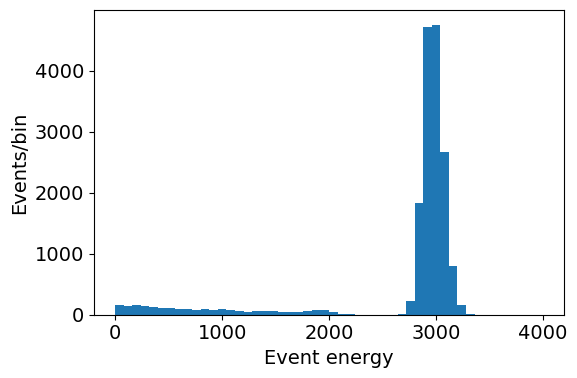

In [21]:
b, e = plot_amplitude(dfgi, num_bins = 50, xmin=0, xmax=4e+3,figsize=(6, 4), title="")

### Select events that pass the cuts of gamma DF (df2c)

In [22]:
sel_gi = df2c.event.values

In [23]:
# Filter the DataFrame using .isin() method
dfi = dfgi[dfgi['event'].isin(sel_gi)]
event_size(dfi)/event_size(dfgi)

0.7632318366878835

In [24]:
event_size(dfi)/event_size(df2c)

1.0

### Sensor positions

In [25]:
dfs = pd.read_csv(f"{g4dir}/{fsp}", header=0)
dfs.head(10)

,sensor_id,sensor_x,sensor_y,sensor_z
0,0,-21,-21,11.7
1,1,-21,-15,11.7
2,2,-21,-9,11.7
3,3,-21,-3,11.7
4,4,-21,3,11.7
5,5,-21,9,11.7
6,6,-21,15,11.7
7,7,-21,21,11.7
8,8,-15,-21,11.7
9,9,-15,-15,11.7


In [26]:
x_spatial = dfs.sensor_x.values
y_spatial = dfs.sensor_y.values

### Plot a few images

xg1 = 20.2, yg1 =-6.4
xg2 = 20.2, yg2 =-6.4


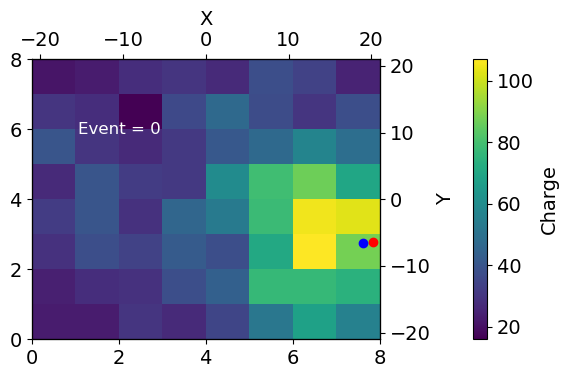

In [27]:
plot_image(dfi, df2c,  sel_gi[0], x_spatial, y_spatial, figsize=(6, 4))

xg1 = -13.9, yg1 =9.2
xg2 = -13.9, yg2 =9.2


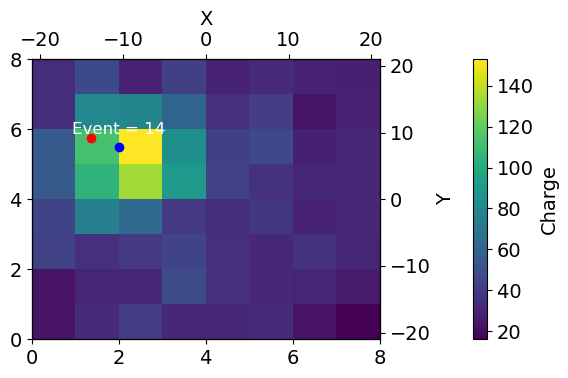

In [28]:
plot_image(dfi, df2c,  sel_gi[11], x_spatial, y_spatial, figsize=(6, 4))

xg1 = -0.6, yg1 =-9.6
xg2 = -0.6, yg2 =-9.6


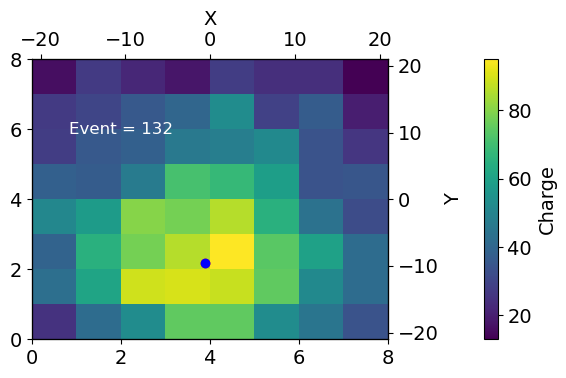

In [29]:
plot_image(dfi, df2c,  sel_gi[100], x_spatial, y_spatial, figsize=(6, 4))

xg1 = -7.8, yg1 =-17.3
xg2 = -7.8, yg2 =-17.3


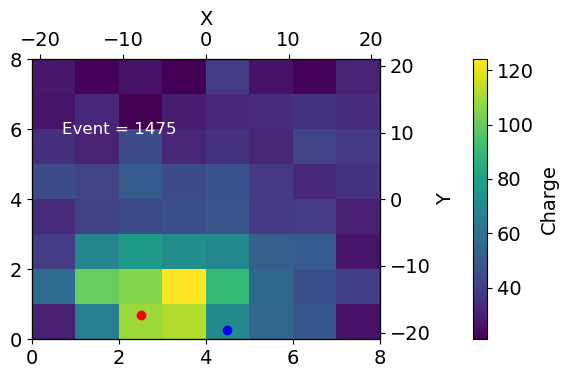

In [30]:
plot_image(dfi, df2c,  sel_gi[1001], x_spatial, y_spatial, figsize=(6, 4))

xg1 = 6.7, yg1 =-21.0
xg2 = 6.7, yg2 =-21.0


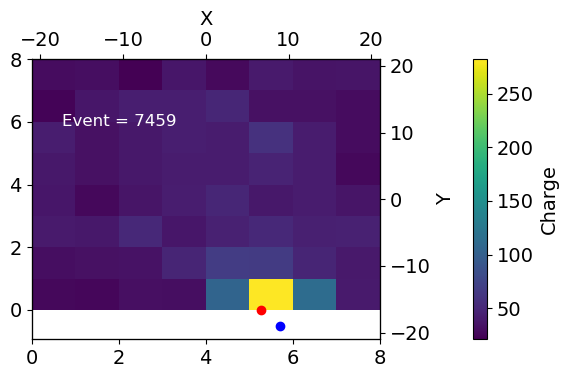

In [31]:
plot_image(dfi, df2c,  sel_gi[5000], x_spatial, y_spatial, figsize=(6, 4))

In [37]:
def test_event_shift(event, fSeed, fNumberOfEvents, fshift=1000):
    seedL4D = fSeed % fshift
    eventShift = (seedL4D -1) * fNumberOfEvents
    eventNumber = event + eventShift
    return seedL4D, eventShift, eventNumber

In [38]:
fSeed=12340001
fNumberOfEvents=10000
event=1
seedL4D, eventShift, e1 = test_event_shift(event, fSeed, fNumberOfEvents, fshift=10000)
print(f"for event = {event}, seed = {fSeed}, nof ={fNumberOfEvents}")
print(f"event shift = {eventShift}, shifted event = {e1}")

for event = 1, seed = 12340001, nof =10000
event shift = 0, shifted event = 1


In [39]:
fSeed=12340002
fNumberOfEvents=1000
event=1
seedL4D, eventShift, e1 = test_event_shift(event, fSeed, fNumberOfEvents, fshift=10000)
print(f"for event = {event}, seed = {fSeed}, nof ={fNumberOfEvents}")
print(f"event shift = {eventShift}, shifted event = {e1}")

for event = 1, seed = 12340002, nof =1000
event shift = 1000, shifted event = 1001


In [40]:
fSeed=12340002
fNumberOfEvents=10000
event=1
seedL4D, eventShift, e1 = test_event_shift(event, fSeed, fNumberOfEvents, fshift=10000)
print(f"for event = {event}, seed = {fSeed}, nof ={fNumberOfEvents}")
print(f"event shift = {eventShift}, shifted event = {e1}")

for event = 1, seed = 12340002, nof =10000
event shift = 10000, shifted event = 10001


In [41]:
fSeed=12340003
fNumberOfEvents=20000
event=1
seedL4D, eventShift, e1 = test_event_shift(event, fSeed, fNumberOfEvents, fshift=10000)
print(f"for event = {event}, seed = {fSeed}, nof ={fNumberOfEvents}")
print(f"event shift = {eventShift}, shifted event = {e1}")

for event = 1, seed = 12340003, nof =20000
event shift = 40000, shifted event = 40001
